In [89]:
# imports
import pandas as pd
import seaborn as sns

In [4]:
# load dataset
df = pd.read_csv('datasets/nobel.csv')

In [5]:
# take a look at data set
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [7]:
# get the shape of the dataset
df.shape

(911, 18)

In [16]:
# show the information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 18 columns):
year                    911 non-null int64
category                911 non-null object
prize                   911 non-null object
motivation              823 non-null object
prize_share             911 non-null object
laureate_id             911 non-null int64
laureate_type           911 non-null object
full_name               911 non-null object
birth_date              883 non-null object
birth_city              883 non-null object
birth_country           885 non-null object
sex                     885 non-null object
organization_name       665 non-null object
organization_city       667 non-null object
organization_country    667 non-null object
death_date              593 non-null object
death_city              576 non-null object
death_country           582 non-null object
dtypes: int64(2), object(16)
memory usage: 128.2+ KB


In [8]:
# are there any missing values?
df.isna().sum()

year                      0
category                  0
prize                     0
motivation               88
prize_share               0
laureate_id               0
laureate_type             0
full_name                 0
birth_date               28
birth_city               28
birth_country            26
sex                      26
organization_name       246
organization_city       244
organization_country    244
death_date              318
death_city              335
death_country           329
dtype: int64

## do all categories have the same count of lauerates

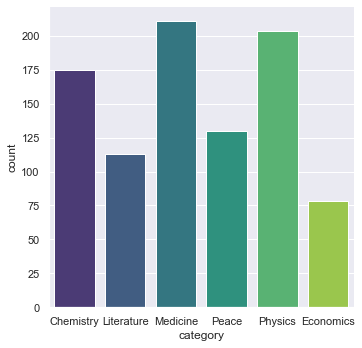

In [21]:
sns.catplot(x='category', data=df, kind='count', palette='viridis');

we notics that all categories have not the same count

## how many of the prizes are by individuals

In [29]:
df['laureate_type'].value_counts()

Individual      881
Organization     30
Name: laureate_type, dtype: int64

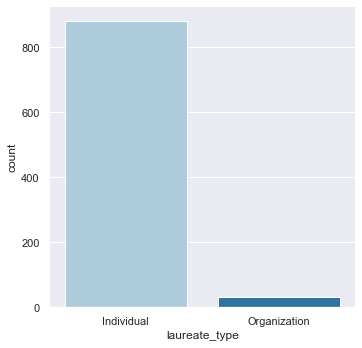

In [28]:
sns.catplot(x='laureate_type', data=df, kind='count', palette='Paired');

## how many of the prizes are by individuals and full share

In [44]:
len(df[(df['prize_share'] == '1/1') & (df['laureate_type'] == 'Individual')])

325

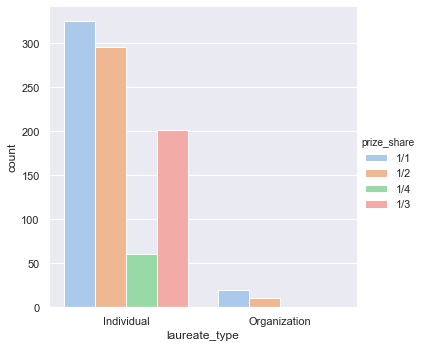

In [27]:
sns.catplot(x='laureate_type',hue='prize_share', data=df, kind='count', palette='pastel');

## What is the mean age of laureates for each category

In [53]:
df['age'] = df['year'] - pd.to_datetime(df['birth_date']).dt.year

In [96]:
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,age
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany,49.0
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France,62.0
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany,47.0
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland,73.0
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France,79.0


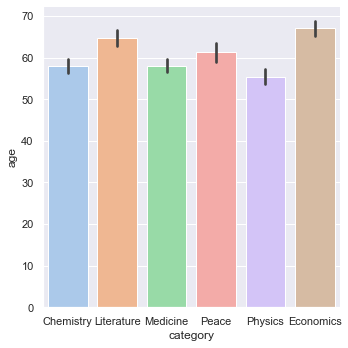

In [56]:
sns.catplot(x='category', y='age', data=df, kind='bar', palette='pastel'); 

## for each category which laureate_type dominates

In [72]:
df.groupby(['category', 'laureate_type']).count().get('laureate_id')

category    laureate_type
Chemistry   Individual       175
Economics   Individual        78
Literature  Individual       113
Medicine    Individual       211
Peace       Individual       100
            Organization      30
Physics     Individual       204
Name: laureate_id, dtype: int64

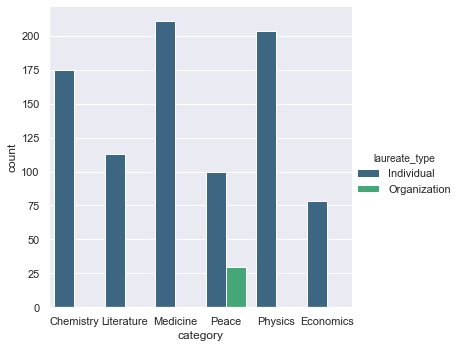

In [61]:
sns.catplot(x='category', hue='laureate_type', data=df, kind='count', palette='viridis');

## in each category which gender is more dominante

In [74]:
df.groupby(['category', 'sex']).count().get('laureate_id')

category    sex   
Chemistry   Female      4
            Male      171
Economics   Female      1
            Male       77
Literature  Female     14
            Male       99
Medicine    Female     12
            Male      199
Peace       Female     16
            Male       88
Physics     Female      2
            Male      202
Name: laureate_id, dtype: int64

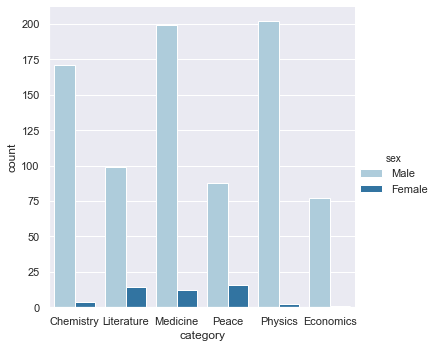

In [91]:

sns.catplot(x='category', hue='sex', data=df, kind='count', palette='Paired');

## which country dominates get the first 10 countries 

In [86]:
df['birth_country'].value_counts().head(10)

United States of America    259
United Kingdom               85
Germany                      61
France                       51
Sweden                       29
Japan                        24
Canada                       18
Netherlands                  18
Russia                       17
Italy                        17
Name: birth_country, dtype: int64

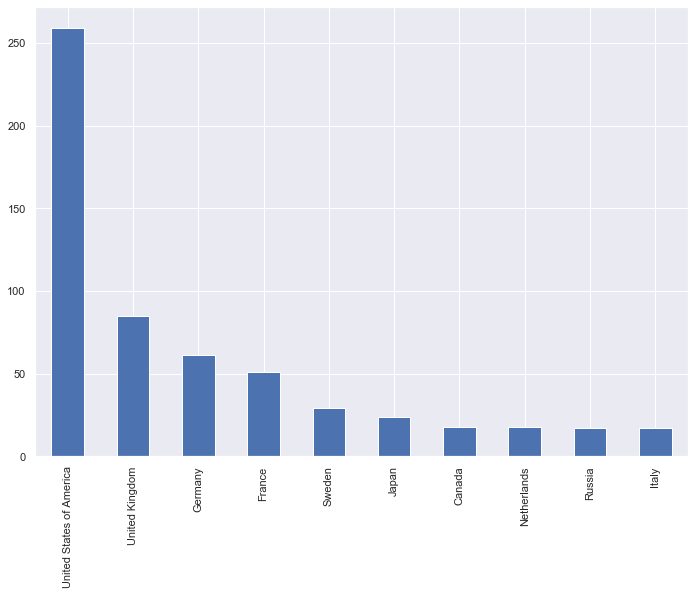

In [90]:
df['birth_country'].value_counts().head(10).plot(kind = 'bar');

## which city dominates get the first 10 cities

In [92]:

df['birth_city'].value_counts().head(10)

New York, NY    45
Paris           25
London          19
Vienna          14
Chicago, IL     12
Berlin          10
Budapest         8
Boston, MA       8
Brooklyn, NY     8
Munich           7
Name: birth_city, dtype: int64

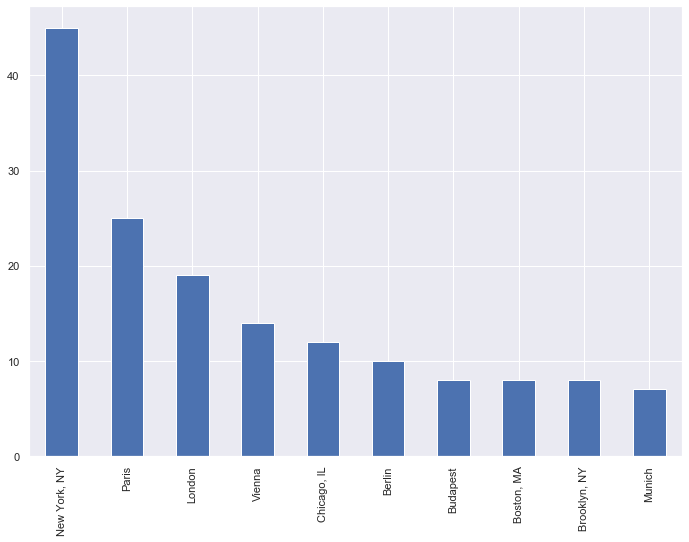

In [94]:
df['birth_city'].value_counts().head(10).plot(kind = 'bar');

## get the ages of the youngest and oldest winner for each year

In [104]:
df.groupby('year')['age'].agg(['min', 'max'])

,min,max
year,,
1901,47.0,79.0
1902,37.0,85.0
1903,36.0,75.0
1904,52.0,74.0
1905,43.0,70.0
1906,48.0,71.0
1907,42.0,74.0
1908,37.0,71.0
1909,35.0,80.0


## get the Oldest and youngest winners of all time

In [114]:
df[df['age'] == df['age'].min()]

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,age
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,Pakistan,Female,NaN,NaN,NaN,NaN,NaN,NaN,17.0


In [115]:
df[df['age'] == df['age'].max()]

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,age
793,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having laid the foundations of mechanism ...",1/3,820,Individual,Leonid Hurwicz,1917-08-21,Moscow,Russia,Male,University of Minnesota,"Minneapolis, MN",United States of America,2008-06-24,"Minneapolis, MN",United States of America,90.0


In [120]:
# who was the first woman to win nobel prize and in which category
df[df['sex'] == 'Female'].head(1)

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country,age
19,1903,Physics,The Nobel Prize in Physics 1903,"""in recognition of the extraordinary services ...",1/4,6,Individual,"Marie Curie, née Sklodowska",1867-11-07,Warsaw,Russian Empire (Poland),Female,NaN,NaN,NaN,1934-07-04,Sallanches,France,36.0


## who won more nobel prizes : extract laureates who won more than once

In [147]:
count = df['full_name'].value_counts()
count[count > 1]

Comité international de la Croix Rouge (International Committee of the Red Cross)    3
Frederick Sanger                                                                     2
Office of the United Nations High Commissioner for Refugees (UNHCR)                  2
John Bardeen                                                                         2
Linus Carl Pauling                                                                   2
Marie Curie, née Sklodowska                                                          2
Name: full_name, dtype: int64

## for each gender for each category get the distibution of age

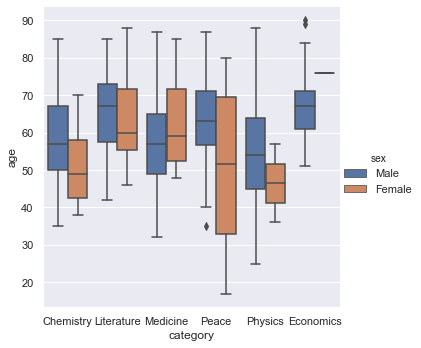

In [149]:
sns.catplot(x = 'category', y='age', hue='sex', data=df, kind='box');
